In [41]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))
from db import helper as db_helper
from common import treat_data, extract_period_returns, extract_volatility_of_prices, reshape_df
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,8))
plt.style.use('seaborn-whitegrid')

In [42]:
session = db_helper.start_session()
df = pd.read_sql_table('spot_rates', session.bind)

2019-05-04 15:56:30,999 INFO sqlalchemy.engine.base.Engine select version()
2019-05-04 15:56:31,001 INFO sqlalchemy.engine.base.Engine {}
2019-05-04 15:56:31,006 INFO sqlalchemy.engine.base.Engine select current_schema()
2019-05-04 15:56:31,007 INFO sqlalchemy.engine.base.Engine {}
2019-05-04 15:56:31,014 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-05-04 15:56:31,015 INFO sqlalchemy.engine.base.Engine {}
2019-05-04 15:56:31,018 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-05-04 15:56:31,020 INFO sqlalchemy.engine.base.Engine {}
2019-05-04 15:56:31,021 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2019-05-04 15:56:31,023 INFO sqlalchemy.engine.base.Engine {}
2019-05-04 15:56:31,027 INFO sqlalchemy.engine.base.Engine SELECT c.relname FROM pg_class c JOIN pg_namespace n ON n.oid = c.relnamespace WHERE n.nspname = %(schema)s AND c.relkind = 'r'
2019-05-04 15:

2019-05-04 15:56:31,133 INFO sqlalchemy.engine.base.Engine {}


In [43]:
df.head()

,id,url,day,month,year,base_currency,target_currency,base_value,target_spot_rate,target_52wk_high,target_52wk_low,created_at,updated_at
0,1,https://www.bankofengland.co.uk/boeapps/databa...,31,5,2007,USD,Australian Dollar,1.0,1.2082,NaN,NaN,2018-12-26 21:40:45.758406,NaT
1,2,https://www.bankofengland.co.uk/boeapps/databa...,31,5,2007,USD,Canadian Dollar,1.0,1.0691,NaN,NaN,2018-12-26 21:40:45.774056,NaT
2,3,https://www.bankofengland.co.uk/boeapps/databa...,31,5,2007,USD,Chinese Yuan,1.0,7.6450,NaN,NaN,2018-12-26 21:40:45.783171,NaT
3,4,https://www.bankofengland.co.uk/boeapps/databa...,31,5,2007,USD,Cyprus Pound,1.0,0.4336,NaN,NaN,2018-12-26 21:40:45.788855,NaT
4,5,https://www.bankofengland.co.uk/boeapps/databa...,31,5,2007,USD,Czech Koruna,1.0,21.0323,NaN,NaN,2018-12-26 21:40:45.802340,NaT


In [44]:
df = treat_data(df)

In [45]:
df.head()

,date,year,month,week,day,base_currency,target_currency_symbol,target_spot_rate
0,2007-05-31,2007,5,22,31,USD,AUD,1.2082
1,2007-05-31,2007,5,22,31,USD,CAD,1.0691
2,2007-05-31,2007,5,22,31,USD,Yuan,7.6450
3,2007-05-31,2007,5,22,31,USD,CYP,0.4336
4,2007-05-31,2007,5,22,31,USD,CZK,21.0323


In [46]:
# Split DF by currency
gbp_df = df[(df['base_currency']=='GBP')]
usd_df = df[(df['base_currency']=='USD')]
eur_df = df[(df['base_currency']=='EUR')]

<Figure size 1152x576 with 0 Axes>

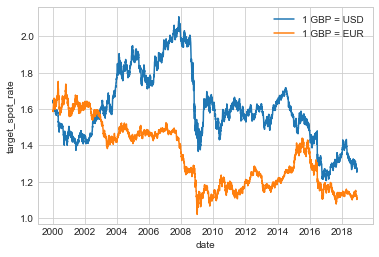

In [48]:
gbp_usd = gbp_df[gbp_df['target_currency_symbol']=='USD']
gbp_eur = gbp_df[gbp_df['target_currency_symbol']=='EUR']
gbp_jpy = gbp_df[gbp_df['target_currency_symbol']=='JPY']

ax = sns.lineplot(x='date', y='target_spot_rate', data=gbp_usd, label='1 GBP = USD')
ax = sns.lineplot(x='date', y='target_spot_rate', data=gbp_eur, label='1 GBP = EUR')
# ax = sns.lineplot(x='date', y='target_spot_rate', data=gbp_jpy, label='1 GBP = JPY')

plt.show()

In [49]:
# This looks like the actually spot rates observed on xe.com

In [50]:
df = extract_period_returns(gbp_df)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [51]:
df.head()

,date,target_spot_rate,one_day_future_return,one_week_future_return,one_month_future_return,one_year_future_return,target_currency_symbol,day,week,month,year
0,2000-01-04,2.4866,0.002775,0.007641,0.010215,0.062012,AUD,4,1,1,2000
1,2000-01-05,2.4935,0.008462,0.002286,0.007419,0.050010,AUD,5,1,1,2000
2,2000-01-06,2.5146,-0.006880,-0.016185,-0.001034,0.041199,AUD,6,1,1,2000
3,2000-01-07,2.4973,0.000000,-0.019221,0.002363,0.048412,AUD,7,1,1,2000
4,2000-01-08,2.4973,0.000000,-0.019221,0.016938,0.060425,AUD,8,1,1,2000


In [52]:
df = extract_volatility_of_prices(df)

In [53]:
df.head()

,date,target_spot_rate,one_day_future_return,one_week_future_return,one_month_future_return,one_year_future_return,target_currency_symbol,day,week,month,year,1w_vol,1m_vol,1y_vol
0,2000-01-04,2.4866,0.002775,0.007641,0.010215,0.062012,AUD,4,1,1,2000,0.00924,0.025274,0.079002
1,2000-01-05,2.4935,0.008462,0.002286,0.007419,0.050010,AUD,5,1,1,2000,0.00924,0.025274,0.079002
2,2000-01-06,2.5146,-0.006880,-0.016185,-0.001034,0.041199,AUD,6,1,1,2000,0.00924,0.025274,0.079002
3,2000-01-07,2.4973,0.000000,-0.019221,0.002363,0.048412,AUD,7,1,1,2000,0.00924,0.025274,0.079002
4,2000-01-08,2.4973,0.000000,-0.019221,0.016938,0.060425,AUD,8,1,1,2000,0.00924,0.025274,0.079002


In [54]:
df = reshape_df(df)

In [55]:
df.head()

,date,day,week,month,year,AUD_target_spot_rate,AUD_1w_vol,AUD_1m_vol,AUD_1y_vol,AUD_one_day_future_return,...,EUR_one_month_future_return,EUR_one_year_future_return,JPY_target_spot_rate,JPY_1w_vol,JPY_1m_vol,JPY_1y_vol,JPY_one_day_future_return,JPY_one_week_future_return,JPY_one_month_future_return,JPY_one_year_future_return
0,2000-01-04,4,1,1,2000,2.4866,0.00924,0.025274,0.079002,0.002775,...,0.021419,-0.004221,168.3929,1.937709,1.469603,6.667391,0.010986,0.034441,0.012634,0.023487
1,2000-01-05,5,1,1,2000,2.4935,0.00924,0.025274,0.079002,0.008462,...,0.022191,-0.009520,170.2429,1.937709,1.469603,6.667391,0.018823,0.023345,0.001629,0.020324
2,2000-01-06,6,1,1,2000,2.5146,0.00924,0.025274,0.079002,-0.006880,...,0.018403,-0.013190,173.4474,1.937709,1.469603,6.667391,-0.004639,0.009821,-0.016876,0.001474
3,2000-01-07,7,1,1,2000,2.4973,0.00924,0.025274,0.079002,0.000000,...,0.021183,-0.012446,172.6427,1.937709,1.469603,6.667391,0.000000,0.004277,-0.001786,0.006142
4,2000-01-08,8,1,1,2000,2.4973,0.00924,0.025274,0.079002,0.000000,...,0.026652,-0.008234,172.6427,1.937709,1.469603,6.667391,0.000000,0.004277,0.022136,0.008593


In [56]:
df.shape

(6523, 45)

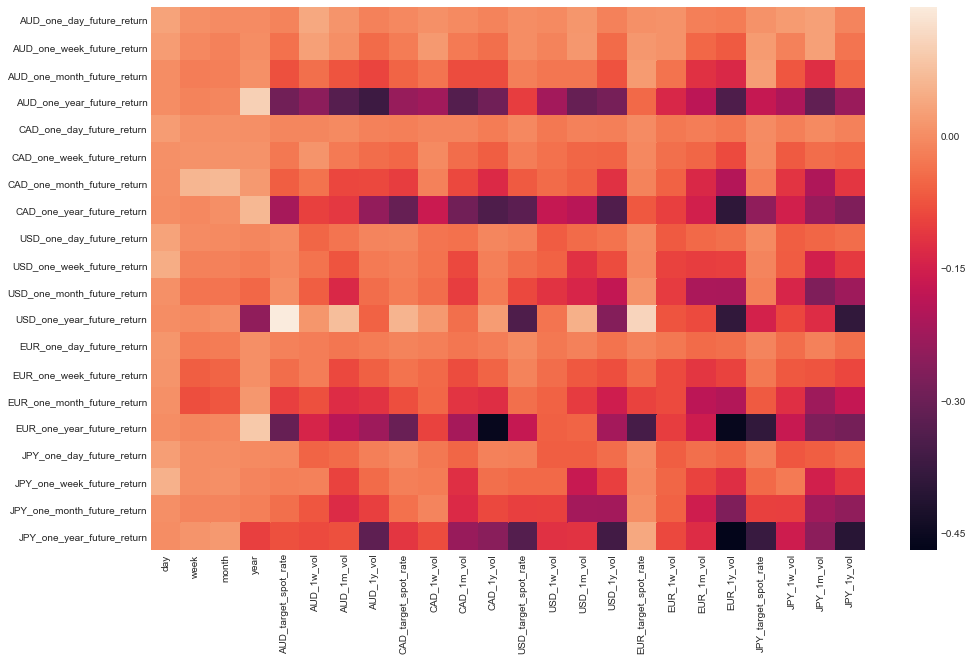

In [38]:
sreturn_cols = [c for c in df.columns if c.endswith('return')]
non_return_cols = [c for c in df.columns if not c.endswith('return')]
non_return_cols.remove('date')

correlation_df = df.corr()
correlation_df = correlation_df.drop(index=non_return_cols)
correlation_df = correlation_df.drop(columns=return_cols)

plt.figure(figsize=(16, 10))
ax = sns.heatmap(correlation_df)